# Token Ring условие

Задача состоит в построении простой модели сетевого протокола в распределенной сети с топологией "кольцо" под названием TokenRing и исследовании его свойств.

1. Система состоит из N пронумерованных от 0 до N-1 узлов (в модели - потоков). Узлы упорядочены по порядковому номеру. После состояния N-1 следует узел 0, т.е. узлы формируют кольцо. 
2. Соседние в кольце потоки могут обмениваться пакетами. При этом обмен возможен только по часовой стрелке. 
3. Каждый поток, получив пакет от предыдущего, отдает его следующему.
4. Пакеты не могут обгонять друг друга.

 
Необходимо исследовать пропускную способность сети (throughput) и характерное время задержки (latency) в зависимости от количества узлов N и количества пакетов P (1...N), находящихся в транзите одновременно.  Для простоты - считайте, что сообщения "выпускаются" в кольцо на старте и не имеют конечной точки.

Дополнительно нужно попытаться оптимизировать (улучшить) throughput или latency как в целом так и для отдельно взятых конкретных режимов (недогруженная сеть, перегруженная сеть) и исследовать влияние оптимизаций для одного режима на весь спектр режимов. Описывете историю оптимизации.

 
Рисуете красивые графики, формулируете свои мысли в виде мини-статьи.
Сдаете рабочий код, статью.

 
Оценка будет зависить от: 
1) корректности кода
2) качества анализа результатов (что наблюдаем, почему, какие могли ли повлиять какие-то сайдэффекты и т.д.)
3) решения доп.задач / ответов на вопросы
4) оформления (кратко, четко, корректно, научный стиль)


Над чем стоит задуматься: 
1) в каком случае считать сеть недогруженной/перегруженной?
2) какую информацию нужно хранить в пакетах и на узлах?
3) как провести замеры производительности?
4) как смоделировать тесты с учетом имеющихся в вашем распоряжении мощностей?
5) что будет отвечать за передачу сообщений? (от самого простого варианта, например с максимумом в 1 сообщение за раз - к более сложным)
6) как сделать результаты наглядными?

In [51]:
import pandas as pd
import numpy as np
import matplotlib
import os
from matplotlib import pyplot as plt
%matplotlib inline

In [52]:
df = pd.read_csv("../resources/nodes3gen4.csv")
df.head()

,Sent,Received,Returned,Frames,Nodes
0,24538665912528,24538671054083,24538686472752,4,3
1,24538671041379,24538676184863,24538691617424,4,3
2,24538676195081,24538686447004,24538696736184,4,3
3,24538681335896,24538686520782,24538701828335,4,3


In [53]:
def plot_throughput_from_frames(nodes):
    
    fr = []
    th = []
    labels = []
    for i in range(2, nodes):
        data_frames = [pd.read_csv("../resources/nodes" + str(i) + "gen" + str(j) + ".csv") for j in range(1, 30)]
        throughputs = []
        frames = []
        labels.append(str(i) + " nodes")
        for df in data_frames:
            frames.append(df.Frames[0])
            throughputs.append(df.Frames[0] / np.mean((df.Returned - df.Sent)))
        fr.append(frames)
        th.append(throughputs)
#         plt.figure(figsize=(10, 10))
#         plt.plot(frames, throughputs, label=labels[i-2])
#         plt.grid()
#         plt.legend()
#         plt.savefig('books_read.png')
#         plt.xlabel("frames")
#         plt.ylabel("throughputs(число пакетов / время получения)")

    plt.figure(figsize=(10, 10))
    plt.plot(fr[0], th[0], label=str(2) + " nodes")
#     plt.plot(fr[1], th[1])
#     plt.plot(fr[2], th[2])

    plt.plot(fr[3], th[3], label=str(5) + " nodes")
#     plt.plot(fr[4], th[4], label=str(4) + " nodes")
#     plt.plot(fr[5], th[5])
#     plt.plot(fr[6], th[6])
    plt.plot(fr[7], th[7], label=str(9) + " nodes")
#     plt.plot(fr[8], th[8])
#     plt.plot(fr[9], th[9])
    plt.plot(fr[10], th[10], label=str(12) + " nodes")
#     plt.plot(fr[11], th[11])
#     plt.plot(fr[12], th[12])
#     plt.plot(fr[13], th[13])
#     plt.plot(fr[14], th[14])
#     plt.plot(fr[15], th[15])
#     plt.plot(fr[16], th[16])
    plt.plot(fr[17], th[17], label=str(19) + " nodes")
    plt.grid()
    plt.legend()
    plt.title("Увеличение throughput при увеличении числа пакетов")
    plt.xlabel("frames")
    plt.ylabel("throughputs(число пакетов / время получения в нс)")
    plt.show()


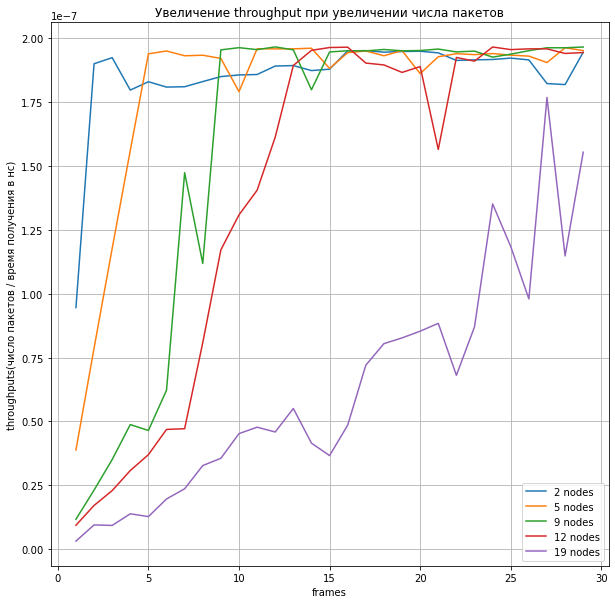

In [54]:
plot_throughput_from_frames(20)

In [55]:
def plot_1_throughput_from_frames(nodes):
    
    fr = []
    th = []
    labels = []
    for i in range(2, nodes):
        data_frames = [pd.read_csv("../resources/nodes" + str(i) + "gen" + str(j) + ".csv") for j in range(1, 30)]
        throughputs = []
        frames = []
        labels.append(str(i) + " nodes")
        for df in data_frames:
            frames.append(df.Frames[0])
            throughputs.append((df.Frames[0] / np.mean((df.Returned - df.Sent))) ** (-1))
        fr.append(frames)
        th.append(throughputs)

    plt.figure(figsize=(10, 10))
    plt.plot(fr[0], th[0], label=str(2) + " nodes")
#     plt.plot(fr[1], th[1])
#     plt.plot(fr[2], th[2])

    plt.plot(fr[3], th[3], label=str(5) + " nodes")
#     plt.plot(fr[4], th[4], label=str(4) + " nodes")
#     plt.plot(fr[5], th[5])
#     plt.plot(fr[6], th[6])
    plt.plot(fr[7], th[7], label=str(9) + " nodes")
#     plt.plot(fr[8], th[8])
#     plt.plot(fr[9], th[9])
    plt.plot(fr[10], th[10], label=str(12) + " nodes")
#     plt.plot(fr[11], th[11])
#     plt.plot(fr[12], th[12])
#     plt.plot(fr[13], th[13])
#     plt.plot(fr[14], th[14])
#     plt.plot(fr[15], th[15])
#     plt.plot(fr[16], th[16])
    plt.plot(fr[17], th[17], label=str(19) + " nodes")
    plt.grid()
    plt.legend()
    plt.title("Уменьшение 1/throughput при увеличении числа пакетов")
    plt.xlabel("frames")
    plt.ylabel("1/throughputs(время получения в нс / число пакетов)")
    plt.show()

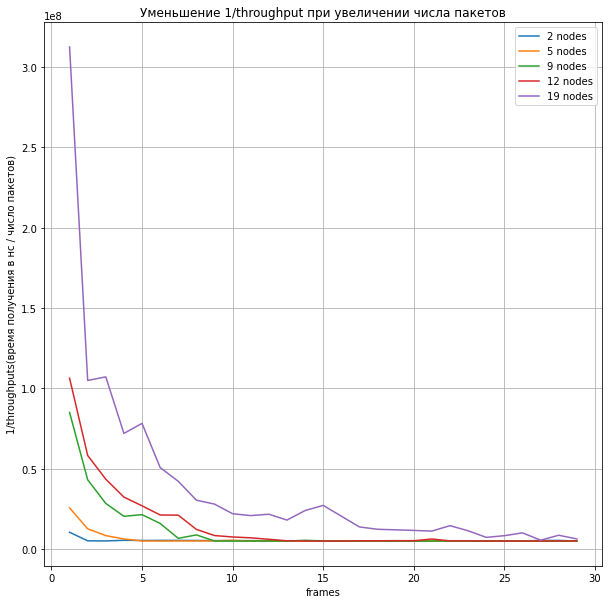

In [56]:
plot_1_throughput_from_frames(20)

In [66]:
def plot_throughput_from_nodes(nodes):    
    nd = []
    th = []
    for i in range(2, nodes):
        data_frames = [pd.read_csv("../resources/nodes" + str(i) + "gen" + str(j) + ".csv") for j in range(1, 30)]
        throughputs = []
        for df in data_frames:
            nodes = df.Nodes[0]
            throughputs.append(df.Frames[0] / np.mean((df.Returned - df.Sent)))
        nd.append(nodes)
        th.append(np.mean(throughputs))

    plt.figure(figsize=(10, 10))
    plt.plot(nd, th)
    plt.grid()
    plt.title("Падение среднего throughput по пакетам при увеличении числа узлов")
    plt.xlabel("nodes")
    plt.ylabel("Средний throughput по пакетам для каждой ноды")
    plt.show()
    return nd, th

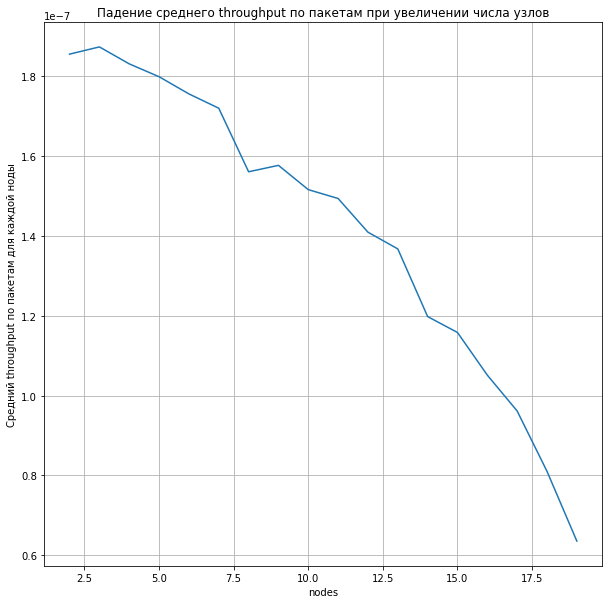

In [67]:
non_nd, non_th = plot_throughput_from_nodes(20)

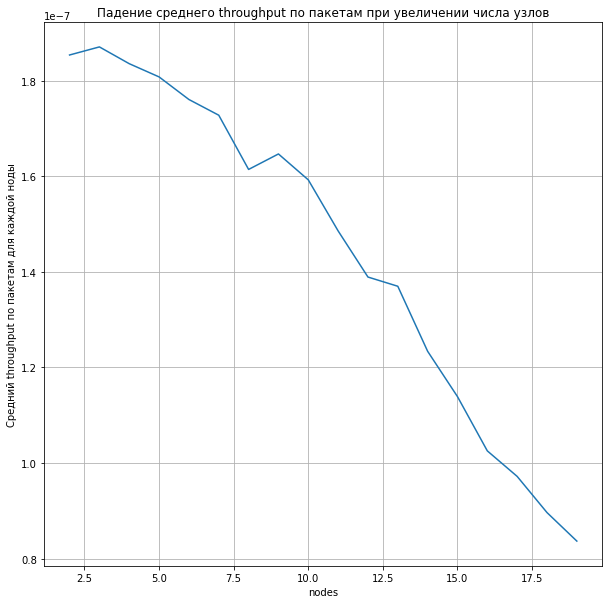

In [70]:
nd, th = plot_throughput_from_nodes(20)

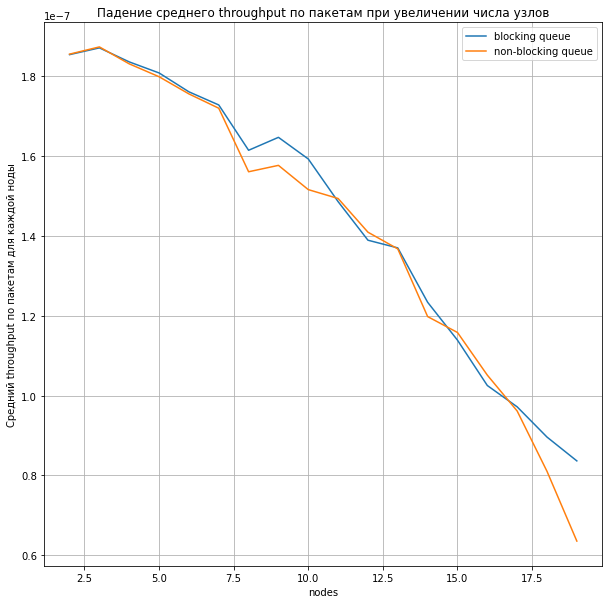

In [72]:
plt.figure(figsize=(10, 10))
plt.plot(nd, th, label='blocking queue')
plt.plot(non_nd, non_th, label='non-blocking queue')
plt.grid()
plt.legend()
plt.title("Падение среднего throughput по пакетам при увеличении числа узлов")
plt.xlabel("nodes")
plt.ylabel("Средний throughput по пакетам для каждой ноды")
plt.show()

In [68]:
def plot_latency_from_nodes(nodes):    
    nd = []
    la = []
    for i in range(2, nodes):
        data_frames = [pd.read_csv("../resources/nodes" + str(i) + "gen" + str(j) + ".csv") for j in range(1, 30)]
        latencies = []
        for df in data_frames:
            nodes = df.Nodes[0]
            latencies.append(np.mean((df.Received - df.Sent)))
        nd.append(nodes)
        la.append(np.mean(latencies))

    print(la)
    plt.figure(figsize=(10, 10))
    plt.plot(nd, la)
    plt.grid()
    plt.title("Рост средней latency при увеличении числа узлов")
    plt.xlabel("nodes")
    plt.ylabel("Средняя latency по пакетам для каждой ноды")
    plt.show()
    
    return nd, la

[5542394.648612892, 7815431.589030406, 10578013.275332825, 14321201.281963019, 16054165.162739731, 20954450.703783326, 29205977.917720996, 31773140.827021994, 35868513.613650896, 39400035.2669151, 48889543.80898913, 53901204.59295565, 62926212.53260637, 65584351.52324297, 87855224.1490641, 95446027.38052307, 106292914.60387723, 123242153.5095084]


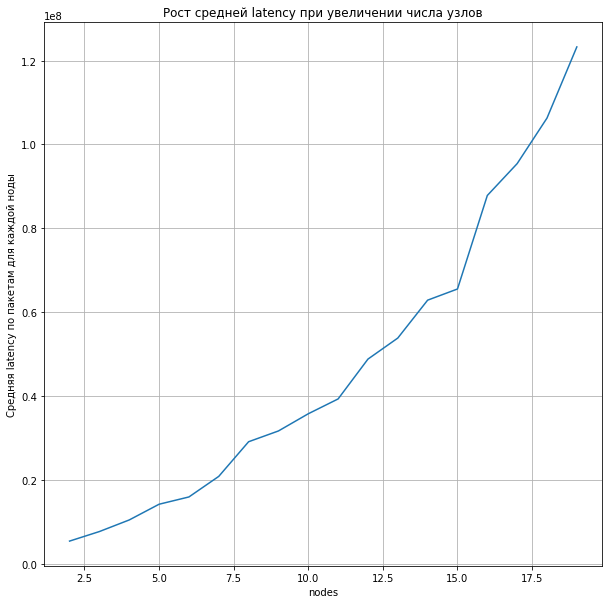

In [69]:
non_nd, non_la = plot_latency_from_nodes(20)

[5527075.871493083, 7691007.549211394, 10836040.295475347, 13723872.49638704, 15890624.505419254, 18175695.30051574, 23718487.68640581, 27065240.631862033, 33061640.833238203, 45126800.01767558, 51027637.66460594, 57693375.81168947, 73485287.0475887, 76968794.67497395, 86217908.99717854, 91642812.17487858, 107357739.02738877, 114921876.0837023]


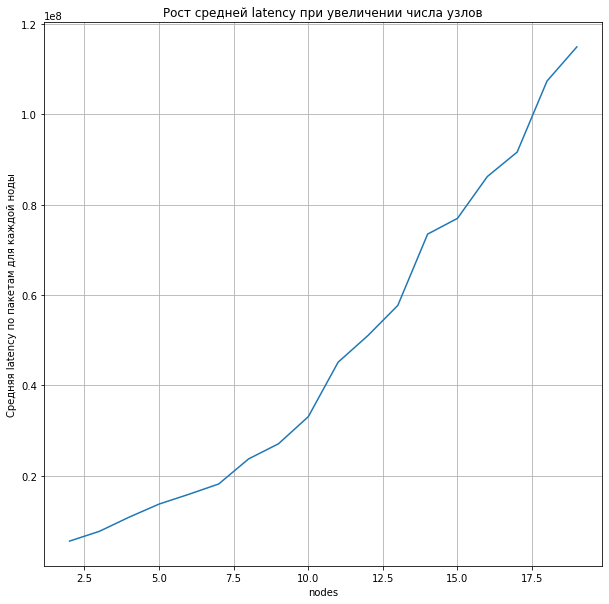

In [73]:
nd, la = plot_latency_from_nodes(20)

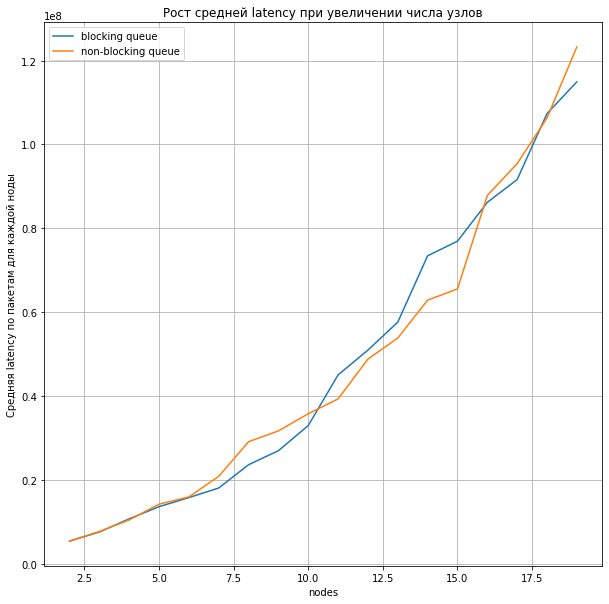

In [75]:
plt.figure(figsize=(10, 10))
plt.plot(nd, la, label='blocking queue')
plt.plot(non_nd, non_la, label='non-blocking queue')
plt.grid()
plt.legend()
plt.title("Рост средней latency при увеличении числа узлов")
plt.xlabel("nodes")
plt.ylabel("Средняя latency по пакетам для каждой ноды")
plt.show()

In [61]:
def plot_latency_from_frames_for_node(nodeId):
    frames = []
    data_frames = [pd.read_csv("../resources/nodes" + str(nodeId) + "gen" + str(j) + ".csv") for j in range(1, 31)]
    latencies = []
    for df in data_frames:
        frames.append(df.Frames[0])
        latencies.append(np.mean((df.Received - df.Sent)))

    plt.figure(figsize=(10, 10))
    plt.scatter(frames, latencies)
    plt.grid()
    plt.title("Падение latency при увеличении числа фреймов")
    plt.xlabel("frames")
    plt.ylabel("latency")
    plt.show()
    
    return frames, latencies

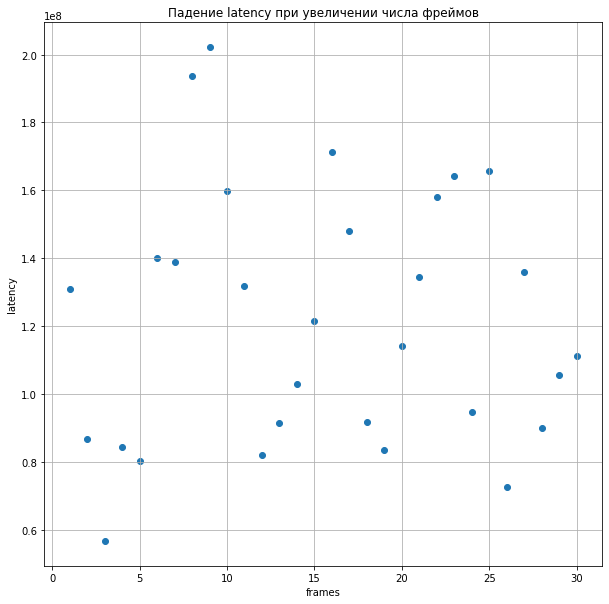

In [62]:
frames_20, latencies_20 = plot_latency_from_frames_for_node(20)

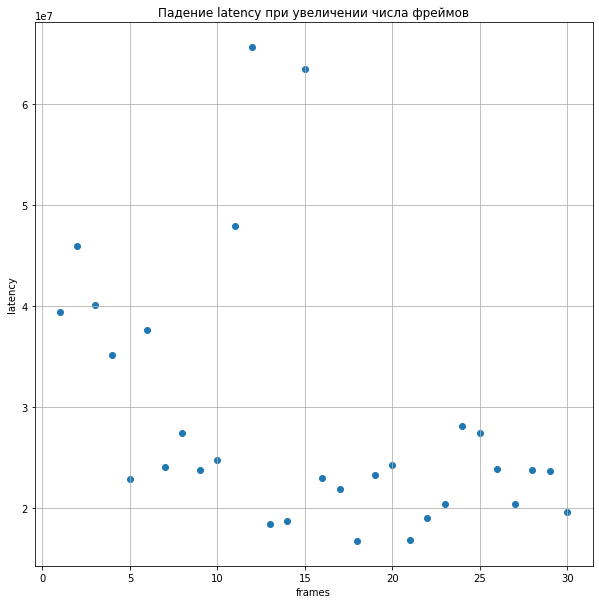

In [63]:
frames_8, latencies_8 = plot_latency_from_frames_for_node(8)

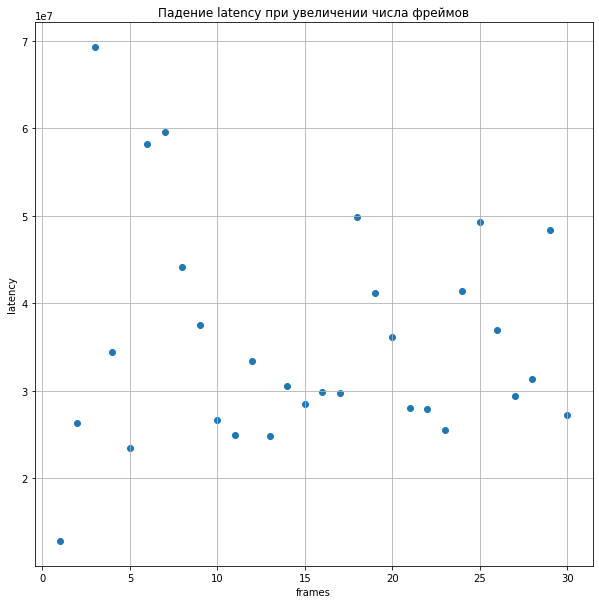

In [64]:
frames_10, latencies_10 = plot_latency_from_frames_for_node(10)

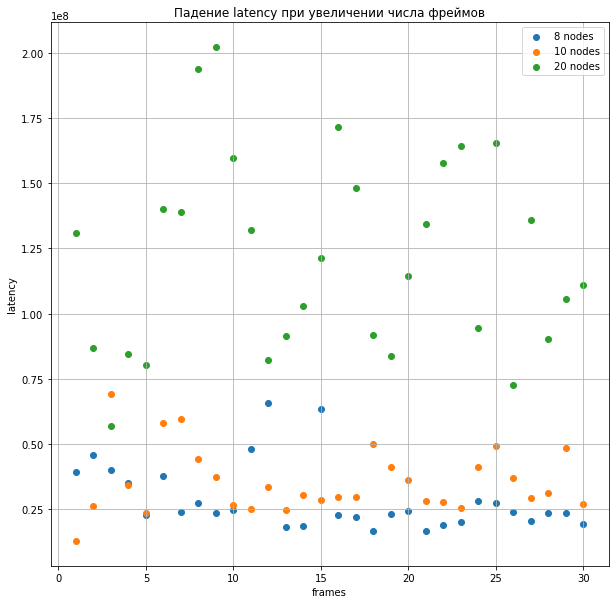

In [65]:
plt.figure(figsize=(10, 10))
plt.scatter(frames_8, latencies_8, label='8 nodes')
plt.scatter(frames_10, latencies_10, label='10 nodes')
plt.scatter(frames_20, latencies_20, label='20 nodes')
plt.grid()
plt.title("Падение latency при увеличении числа фреймов")
plt.xlabel("frames")
plt.ylabel("latency")
plt.legend()
plt.show()